In [38]:
import pandas as pd

In [39]:
df_original = pd.read_csv('datasets/housing.csv', usecols=['longitude','latitude','median_house_value'])
df = df_original.copy()

In [40]:
df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


kmeans clustering workflow

visualize the data

<Axes: xlabel='longitude', ylabel='latitude'>

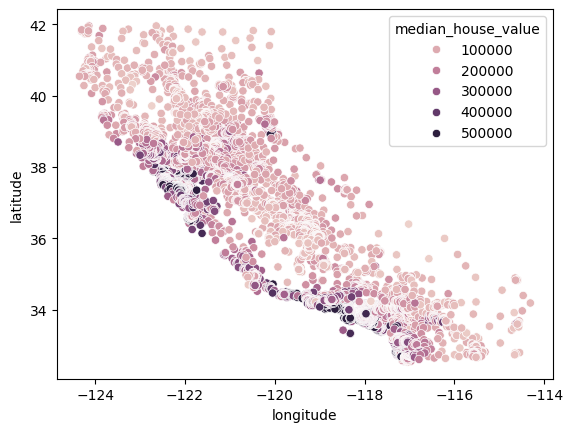

In [42]:
import seaborn as sns

sns.scatterplot(df, x='longitude',y='latitude',hue='median_house_value')

normalizing the data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['latitude', 'longitude']], df[['median_house_value']], test_size=0.33, random_state=0)

normalizing the data
basically scale the values of features of the dataset to a common range, usually between 0 and 1

In [44]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

fitting and evaluating the model

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

Once the data are fit, we can access labels from the labels_ attribute. Below, we visualize the data we just fit. 

<Axes: xlabel='longitude', ylabel='latitude'>

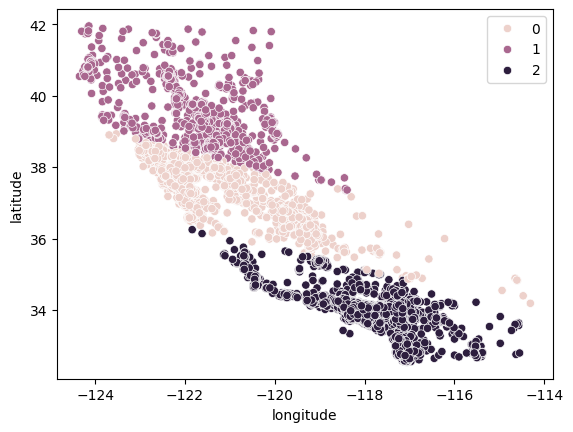

In [46]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

In [47]:
print(y_train.columns)


Index(['median_house_value'], dtype='object')


<Axes: ylabel='median_house_value'>

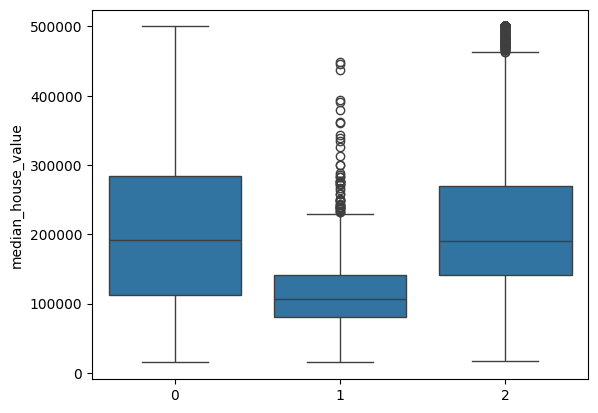

In [48]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

evaluate the performance of the clustering

In [49]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)